prediction for 10: 18.61136200637457
lowest mean squared error: 1.3854609586968787


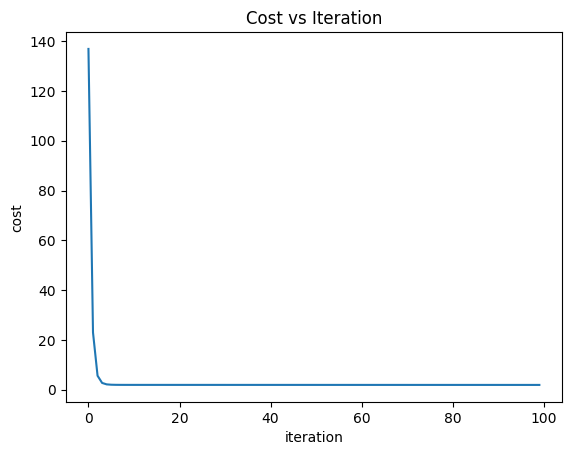

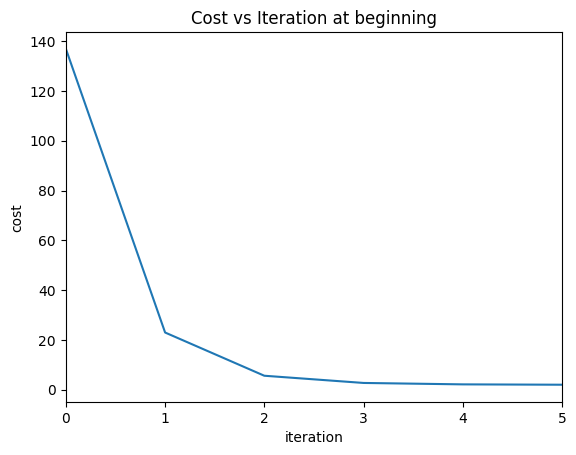

In [94]:
# This program is a simple implementation of a linear regression (y = wx + b), where we use 
# mean squared error algorithm to calculate the cost of the function
# by taking its partial derivatives for the gradient descent to figure out w(Weight) and b(Bias).

# Import numpy (commonly used library for Machine Learning math).
import numpy
import matplotlib.pyplot as plt

%matplotlib inline

def linear_regression(InInput, InWeight, InBias):
    # Params:
    # InInput [scalar] - Input to predict.
    # InWeight [scalar] - Weight for the prediction.
    # InBias [scalar] - Bias for the prediciton.
    # Returns:
    # [scalar] - Predicted value.
    
    return InWeight * InInput + InBias

# J(w, b) = 1/2m * sum(i->m-1)(Fw,b(xi) - yi)**2 (mean squared error for the linear regression) 
def cost_function(InDataSet_Inputs, InDataSet_Outputs, InWeight, InBias, InFunction):
    # Params:
    # InDataSet_Input [numpy.array] - Training inputs.
    # InDataSet_Outputs [numpy.array] - Training outputs.
    # InWeight [scalar] - Weight for the given iteration.
    # InBias [scalar] - Bias for the given iteration.
    # Returns:
    # OutCost [scalar] - Cost of the function InFunction, found by mean squared error.
    
    # Define number of records for training.
    m = InDataSet_Inputs.shape[0]
    
    # Sum the errors.
    OutCost = 0
    for i in range(m):
        
        # Find the linear regression func value.
        linear_regression = InFunction(InDataSet_Inputs[i], InWeight, InBias)
        
        OutCost += (linear_regression - InDataSet_Outputs[i]) ** 2
    
    OutCost /= 2 * m
    
    return OutCost
 
def train_linear_regression(InDataSet_Inputs, InDataSet_Outputs, InStep, InIterations):
    # Input:
    # InDataSet_Input [numpy.array] - Training inputs.
    # InDataSet_Outputs [numpy.array] - Training outputs.
    # InStep [scalar] - Alpha step in linear regression.
    # InIterations [scalar] - Gradient descent iterations.
    # Output:
    # OutWeight [scalar] - Output weight which can be used in the linear regression prediction.
    # OutBias [scalar] - Output bias which can be used in the linear regression prediction.
    
    # Define number of records for training.
    m = InDataSet_Inputs.shape[0]
    
    # Initialize return values weight and bias.
    OutWeight = 0
    OutBias = 0
    
    # Initialize container for the cost history to see how the gradient descent was progressing.
    cost_history = numpy.empty((0,), dtype = float)
    num_of_iteration = numpy.empty((0,), dtype = int)
    
    # Training loop.
    for i in range(InIterations + 1):
        
        # Find partial derivatives over dw and db used in gradient descent.
        sum_dw = 0;
        sum_db = 0;
        
        for n in range(m - 1):
            sum_dw += ((OutWeight * InDataSet_Inputs[n]) + OutBias - InDataSet_Outputs[n]) * InDataSet_Inputs[n]
            sum_db += ((OutWeight * InDataSet_Inputs[n]) + OutBias - InDataSet_Outputs[n])
            
        dw = sum_dw / m
        db = sum_db / m
        
        # Find weight and bias via gradient descent.
        temp_OutWeight = OutWeight - (InStep * dw)
        temp_OutBias = OutBias - (InStep * db)
        
        OutWeight = temp_OutWeight
        OutBias = temp_OutBias
        
        if(i == 0 or i < 100):
            cost_history = numpy.append(cost_history, cost_function(InDataSet_Inputs, InDataSet_Outputs, OutWeight, OutBias, linear_regression))
            num_of_iteration = numpy.append(num_of_iteration, i)
    
    return OutWeight, OutBias, cost_history, num_of_iteration

# Define our training dataset - temperature by ice creams sold.
icecreams_sold = numpy.array([10.0, 12.0, 14.0, 17.0, 21.0, 23.0, 28.0, 35.0])
celsius_temperature = numpy.array([18.0, 22.0, 26.0, 36.0, 40.0, 48.0, 54.0, 71.0])

w, b, cost_history, num_of_iteration = train_linear_regression(icecreams_sold, celsius_temperature, 0.002, 30000)
toPredict = 10

print(f"prediction for {toPredict}: {linear_regression(toPredict, w, b)}")
print(f"lowest mean squared error: {cost_function(icecreams_sold, celsius_temperature, w, b, linear_regression)}")

fig, cost_plot1 = plt.subplots(1, 1)

cost_plot1.set_title("Cost vs Iteration")
cost_plot1.set_xlabel("iteration")
cost_plot1.set_ylabel("cost")
cost_plot1.plot(num_of_iteration, cost_history)

plt.show()

fig, cost_plot2 = plt.subplots(1, 1)

cost_plot2.set_title("Cost vs Iteration at beginning")
cost_plot2.set_xlabel("iteration")
cost_plot2.set_ylabel("cost")
cost_plot2.plot(num_of_iteration, cost_history)
cost_plot2.set_xlim(0, 5)

plt.show()